In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime 
import folium

In [3]:
df = pd.read_csv('yellow_tripdata_2016-03.csv')

In [4]:
df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12210942,1,2016-03-30 13:41:39,2016-03-30 15:04:46,4,17.8,-73.790436,40.646561,2,Y,-73.981987,40.762718,2,52.0,0.0,0.5,0.0,5.54,0.3,58.34
12210943,1,2016-03-31 13:41:59,2016-03-31 13:59:01,1,1.5,-73.986847,40.761150,1,Y,-73.967972,40.765274,2,11.5,0.0,0.5,0.0,0.00,0.3,12.30
12210944,1,2016-03-31 21:43:11,2016-03-31 22:29:27,4,18.9,-73.790565,40.644451,1,Y,-73.951981,40.700272,2,57.5,0.5,0.5,0.0,0.00,0.3,58.80
12210945,1,2016-03-20 08:45:16,2016-04-24 13:26:11,2,19.5,-73.788055,40.641483,2,N,-74.003151,40.731781,1,52.0,0.0,0.5,7.0,0.00,0.3,59.80
12210946,1,2016-03-20 08:59:21,2016-04-18 10:58:05,1,12.1,-73.789154,40.646736,1,N,-73.875351,40.757648,1,34.5,0.0,0.5,5.0,0.00,0.3,40.30
12210947,1,2016-03-31 16:34:36,2016-03-31 16:34:36,1,0.0,0.000000,0.000000,1,Y,0.000000,0.000000,2,19.0,1.0,0.5,0.0,0.00,0.3,20.80
12210948,1,2016-03-26 03:02:32,2016-06-14 18:47:55,1,0.4,-73.977356,40.774471,1,N,-73.982536,40.772408,1,4.0,1.0,0.5,1.7,0.00,0.3,7.50
12210949,1,2016-03-20 08:43:59,2016-06-27 15:05:01,1,20.2,0.000000,0.000000,2,N,-74.008614,40.710987,1,52.0,0.0,0.5,6.0,5.54,0.3,64.34
12210950,1,2016-03-20 08:49:47,2016-06-28 19:11:27,1,15.4,-73.790077,40.647377,1,N,-73.971756,40.578457,1,42.5,1.0,0.5,5.0,0.00,0.3,49.30
12210951,1,2016-03-20 08:50:24,2016-06-29 15:58:16,1,17.5,-73.798485,40.645096,2,N,-73.993111,40.725880,1,52.0,0.0,0.5,13.2,0.00,0.3,66.00


In [5]:
df['store_and_fwd_flag'].replace(['Y','N'],
                        [0, 1], inplace=True)

In [6]:
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])

In [7]:
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
df["tpep_dropoff_datetime"].diff()

0                         NaT
1             0 days 00:03:11
2             0 days 00:20:00
3           -1 days +23:28:54
4             0 days 00:00:00
                  ...        
12210947   -18 days +05:36:31
12210948     75 days 02:13:19
12210949     12 days 20:17:06
12210950      1 days 04:06:26
12210951      0 days 20:46:49
Name: tpep_dropoff_datetime, Length: 12210952, dtype: timedelta64[ns]

In [9]:
df['duration']=df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"].shift(1)

In [10]:
df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
12210942,1,2016-03-30 13:41:39,2016-03-30 15:04:46,4,17.8,-73.790436,40.646561,2,0,-73.981987,40.762718,2,52.0,0.0,0.5,0.0,5.54,0.3,58.34,0 days 16:39:04
12210943,1,2016-03-31 13:41:59,2016-03-31 13:59:01,1,1.5,-73.986847,40.761150,1,0,-73.967972,40.765274,2,11.5,0.0,0.5,0.0,0.00,0.3,12.30,1 days 00:17:22
12210944,1,2016-03-31 21:43:11,2016-03-31 22:29:27,4,18.9,-73.790565,40.644451,1,0,-73.951981,40.700272,2,57.5,0.5,0.5,0.0,0.00,0.3,58.80,0 days 08:47:28
12210945,1,2016-03-20 08:45:16,2016-04-24 13:26:11,2,19.5,-73.788055,40.641483,2,1,-74.003151,40.731781,1,52.0,0.0,0.5,7.0,0.00,0.3,59.80,23 days 15:43:00
12210946,1,2016-03-20 08:59:21,2016-04-18 10:58:05,1,12.1,-73.789154,40.646736,1,1,-73.875351,40.757648,1,34.5,0.0,0.5,5.0,0.00,0.3,40.30,29 days 02:12:49
12210947,1,2016-03-31 16:34:36,2016-03-31 16:34:36,1,0.0,0.000000,0.000000,1,0,0.000000,0.000000,2,19.0,1.0,0.5,0.0,0.00,0.3,20.80,11 days 07:35:15
12210948,1,2016-03-26 03:02:32,2016-06-14 18:47:55,1,0.4,-73.977356,40.774471,1,1,-73.982536,40.772408,1,4.0,1.0,0.5,1.7,0.00,0.3,7.50,75 days 02:13:19
12210949,1,2016-03-20 08:43:59,2016-06-27 15:05:01,1,20.2,0.000000,0.000000,2,1,-74.008614,40.710987,1,52.0,0.0,0.5,6.0,5.54,0.3,64.34,93 days 12:02:29
12210950,1,2016-03-20 08:49:47,2016-06-28 19:11:27,1,15.4,-73.790077,40.647377,1,1,-73.971756,40.578457,1,42.5,1.0,0.5,5.0,0.00,0.3,49.30,100 days 10:27:28
12210951,1,2016-03-20 08:50:24,2016-06-29 15:58:16,1,17.5,-73.798485,40.645096,2,1,-73.993111,40.725880,1,52.0,0.0,0.5,13.2,0.00,0.3,66.00,101 days 07:08:29


In [11]:
df = df.drop(["VendorID","tpep_pickup_datetime","tpep_dropoff_datetime"], axis=1)

In [12]:
df.tail(10)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
12210942,4,17.8,-73.790436,40.646561,2,0,-73.981987,40.762718,2,52.0,0.0,0.5,0.0,5.54,0.3,58.34,0 days 16:39:04
12210943,1,1.5,-73.986847,40.761150,1,0,-73.967972,40.765274,2,11.5,0.0,0.5,0.0,0.00,0.3,12.30,1 days 00:17:22
12210944,4,18.9,-73.790565,40.644451,1,0,-73.951981,40.700272,2,57.5,0.5,0.5,0.0,0.00,0.3,58.80,0 days 08:47:28
12210945,2,19.5,-73.788055,40.641483,2,1,-74.003151,40.731781,1,52.0,0.0,0.5,7.0,0.00,0.3,59.80,23 days 15:43:00
12210946,1,12.1,-73.789154,40.646736,1,1,-73.875351,40.757648,1,34.5,0.0,0.5,5.0,0.00,0.3,40.30,29 days 02:12:49
12210947,1,0.0,0.000000,0.000000,1,0,0.000000,0.000000,2,19.0,1.0,0.5,0.0,0.00,0.3,20.80,11 days 07:35:15
12210948,1,0.4,-73.977356,40.774471,1,1,-73.982536,40.772408,1,4.0,1.0,0.5,1.7,0.00,0.3,7.50,75 days 02:13:19
12210949,1,20.2,0.000000,0.000000,2,1,-74.008614,40.710987,1,52.0,0.0,0.5,6.0,5.54,0.3,64.34,93 days 12:02:29
12210950,1,15.4,-73.790077,40.647377,1,1,-73.971756,40.578457,1,42.5,1.0,0.5,5.0,0.00,0.3,49.30,100 days 10:27:28
12210951,1,17.5,-73.798485,40.645096,2,1,-73.993111,40.725880,1,52.0,0.0,0.5,13.2,0.00,0.3,66.00,101 days 07:08:29


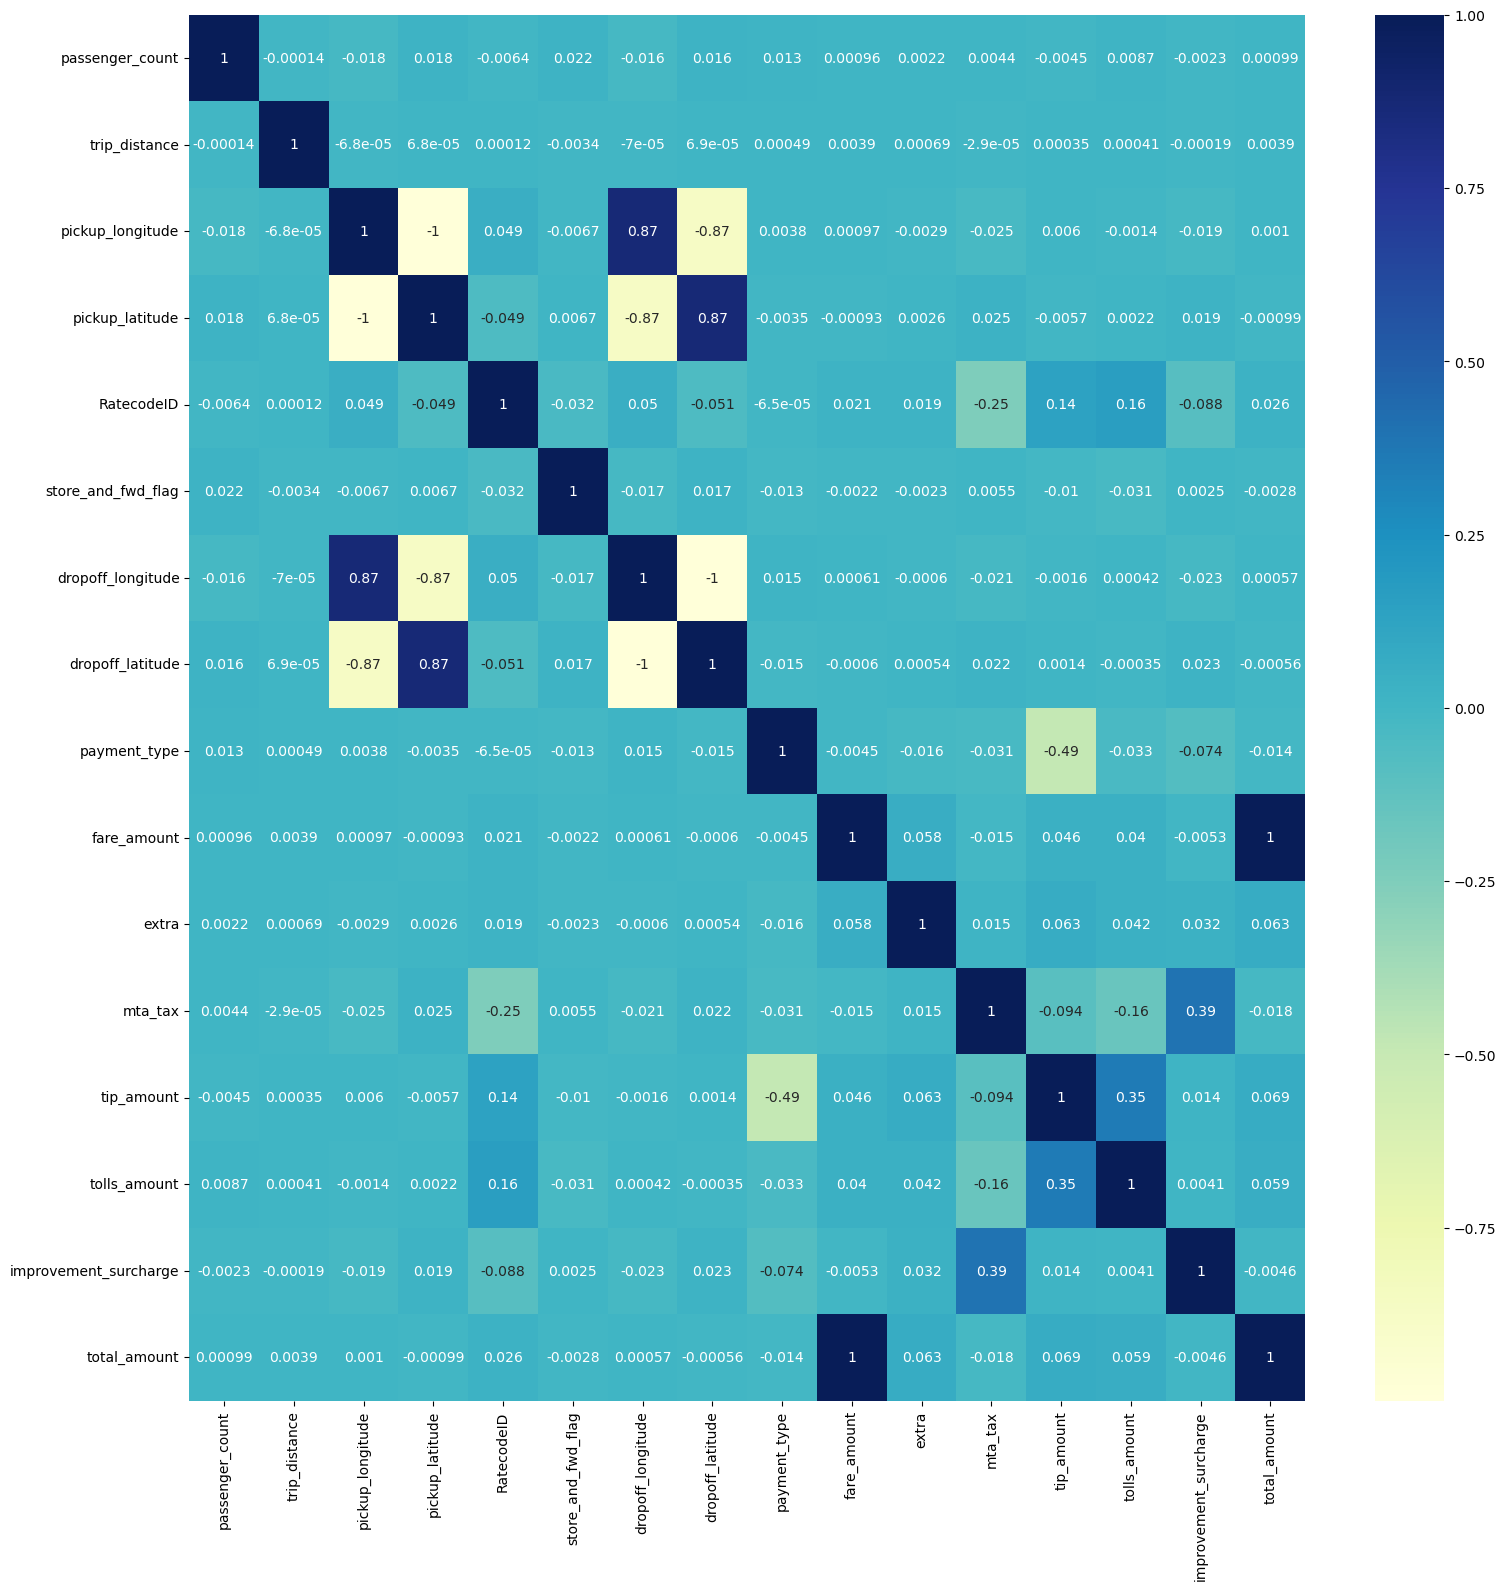

Index(['passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'duration'],
      dtype='object')

In [13]:
plt.subplots(figsize=(18,18))
dataplot= sb.heatmap(df.corr(), cmap="YlGnBu",annot=True) 
plt.show()
df.columns

Top features for target 1: ['total_amount', 'fare_amount', 'tip_amount', 'extra', 'tolls_amount']


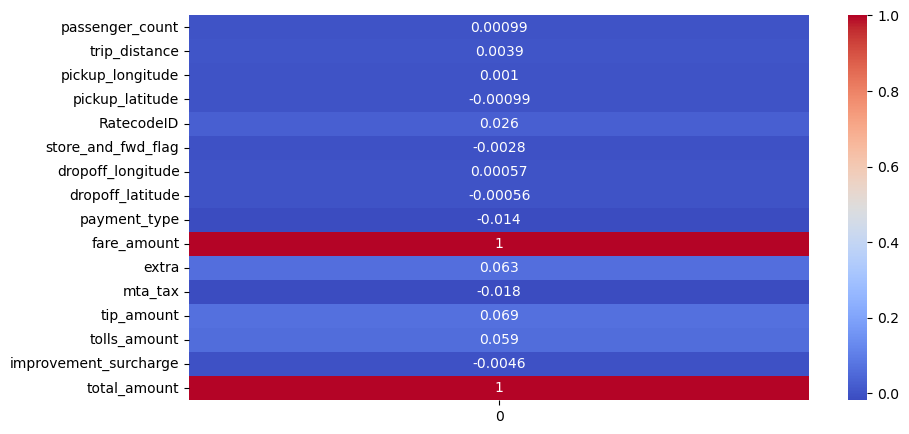

In [14]:
corr_matrix_target1 = df.corrwith(df['total_amount'])
fig, ax = plt.subplots(figsize=(10,5))
sb.heatmap(corr_matrix_target1.to_frame(), annot=True, cmap='coolwarm', ax=ax)
top_n_features_target1 = corr_matrix_target1.abs().sort_values(ascending=False).head().index.tolist()
print(f"Top features for target 1: {top_n_features_target1}")


In [15]:
df = df.drop(["pickup_longitude","pickup_latitude","RatecodeID","store_and_fwd_flag","dropoff_longitude","dropoff_latitude",'payment_type','mta_tax','tip_amount','duration'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   passenger_count        int64  
 1   trip_distance          float64
 2   fare_amount            float64
 3   extra                  float64
 4   tolls_amount           float64
 5   improvement_surcharge  float64
 6   total_amount           float64
dtypes: float64(6), int64(1)
memory usage: 652.1 MB


In [17]:
df.head(10)

,passenger_count,trip_distance,fare_amount,extra,tolls_amount,improvement_surcharge,total_amount
0,1,2.50,9.0,0.5,0.00,0.3,12.35
1,1,2.90,11.0,0.5,0.00,0.3,15.35
2,2,19.98,54.5,0.5,0.00,0.3,63.80
3,3,10.78,31.5,0.0,5.54,0.3,41.62
4,5,30.43,98.0,0.0,15.50,0.3,113.80
5,5,5.92,23.5,1.0,0.00,0.3,30.36
6,6,5.72,23.0,0.5,0.00,0.3,24.30
7,1,6.20,20.5,0.5,0.00,0.3,21.80
8,1,0.70,5.5,0.5,0.00,0.3,8.80
9,3,7.18,23.5,0.5,0.00,0.3,28.00


In [18]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
y_train

array([14.75,  8.3 , 21.36, ..., 15.3 ,  7.56, 11.3 ])

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Performance of Testing\n")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)
adj_r2_test = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Testing adjusted R2 score: {adj_r2_test:.3f}')
y_predi = reg.predict(X_train)

print("\nPerformance of Training\n")
msei = mean_squared_error(y_train, y_predi)
print("Mean Squared Error:", msei)
r2i = r2_score(y_train, y_predi)
print('R-squared:', r2i) 
adj_r2_train = 1 - (1 - r2i) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print(f'Training adjusted R2 score: {adj_r2_train:.3f}')

Performance of Testing

Mean Squared Error: 6.022851560682317
R-squared: 0.9669241124077861
Testing adjusted R2 score: 0.967

Performance of Training

Mean Squared Error: 5.507954981027076
R-squared: 0.9997857705851058
Training adjusted R2 score: 1.000


In [23]:
df1=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

In [24]:
df1.head(10)

,Actual,Predicted
0,9.36,9.351698
1,11.76,11.609188
2,56.80,58.483908
3,11.15,10.966165
4,12.30,12.109375
5,11.80,13.295331
6,11.16,10.852259
7,23.19,23.664823
8,35.49,28.858982
9,5.80,7.406996


In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Bin the target variable into 10 categories
y_train = pd.cut(y_train, bins=10, labels=False)

# Create a Random Forest Classifier
rfc = RandomForestRegressor()

# Train the model on the training set
rfc.fit(X_train, y_train)

# Make predictions on the testing set
Y_pred= rfc.predict(X_test)


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Performance of Testing\n")
mse = mean_squared_error(y_test, Y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, Y_pred)
print('R-squared:', r2)
adj_r2_test = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Testing adjusted R2 score: {adj_r2_test:.3f}')
Y_predi = reg.predict(X_train)

print("\nPerformance of Training\n")
msei = mean_squared_error(y_train, Y_predi)
print("Mean Squared Error:", msei)
r2i = r2_score(y_train, Y_predi)
print('R-squared:', r2i) 
adj_r2_train = 1 - (1 - r2i) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print(f'Training adjusted R2 score: {adj_r2_train:.3f}')

Performance of Testing

Mean Squared Error: 437.65197644748486
R-squared: -1.403467432600535
Testing adjusted R2 score: -1.403

Performance of Training

Mean Squared Error: 25962.26761909119
R-squared: -2360817513.3052936
Training adjusted R2 score: -2360819170.473


In [28]:
from tabulate import tabulate

# Performance measures for linear regression
linear_regression_mse_test = 6.022851560682316
linear_regression_r2_test = 0.9669241124077861
linear_regression_adj_r2_test = 0.967
linear_regression_mse_train = 5.507954981027076
linear_regression_r2_train = 0.9997857705851058
linear_regression_adj_r2_train = 1.000

# Performance measures for random forest
random_forest_mse_test = 437.65197644748486
random_forest_r2_test = -1.403467432600535
random_forest_adj_r2_test = -1.403
random_forest_mse_train = 25962.26761909119
random_forest_r2_train = -2360817513.3052936
random_forest_adj_r2_train = -2360819170.473

# Create table data
data = [
    ["Model", "Mean Squared Error (MSE)", "R-squared", "Adjusted R-squared"],
    ["Linear Regression (Test)", linear_regression_mse_test, linear_regression_r2_test, linear_regression_adj_r2_test],
    ["Random Forest (Test)", random_forest_mse_test, random_forest_r2_test, random_forest_adj_r2_test],
    ["Linear Regression (Train)", linear_regression_mse_train, linear_regression_r2_train, linear_regression_adj_r2_train],
    ["Random Forest (Train)", random_forest_mse_train, random_forest_r2_train, random_forest_adj_r2_train]
]

# Define table headers and format
headers = data[0]
table_data = data[1:]
table_format = "fancy_grid"

# Print the colored table
table = tabulate(table_data, headers, tablefmt=table_format)
print(table)


╒═══════════════════════════╤════════════════════════════╤══════════════╤══════════════════════╕
│ Model                     │   Mean Squared Error (MSE) │    R-squared │   Adjusted R-squared │
╞═══════════════════════════╪════════════════════════════╪══════════════╪══════════════════════╡
│ Linear Regression (Test)  │                    6.02285 │  0.966924    │          0.967       │
├───────────────────────────┼────────────────────────────┼──────────────┼──────────────────────┤
│ Random Forest (Test)      │                  437.652   │ -1.40347     │         -1.403       │
├───────────────────────────┼────────────────────────────┼──────────────┼──────────────────────┤
│ Linear Regression (Train) │                    5.50795 │  0.999786    │          1           │
├───────────────────────────┼────────────────────────────┼──────────────┼──────────────────────┤
│ Random Forest (Train)     │                25962.3     │ -2.36082e+09 │         -2.36082e+09 │
╘═══════════════════════════╧═

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'X' is the feature matrix and 'y' is the target variable

# Create a linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
num_folds = 5
mse_scores = cross_val_score(model, X, y, cv=num_folds, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=num_folds, scoring='r2')

# Calculate mean and standard deviation of the MSE scores
mean_mse = -np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Calculate mean and standard deviation of the R-squared scores
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Calculate adjusted R-squared
n = X.shape[0]  # Number of samples
p = X.shape[1]  # Number of features
adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)

print("Cross-Validation Results")
print("Mean Squared Error (MSE): {:.4f}".format(mean_mse))
print("Standard Deviation MSE: {:.4f}".format(std_mse))
print("R-squared: {:.4f}".format(mean_r2))
print("Standard Deviation R-squared: {:.4f}".format(std_r2))
print("Adjusted R-squared: {:.4f}".format(adj_r2))


Cross-Validation Results
Mean Squared Error (MSE): 5.7862
Standard Deviation MSE: 0.3957
R-squared: 0.9813
Standard Deviation R-squared: 0.0151
Adjusted R-squared: 0.9813


In [30]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('Pay.pickle')
print(projectabspathname)
projectname = 'Pay.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

C:\Users\Shabeeh Shakkir\Desktop\suyati\Pay.pickle
